# Introduction

In [ ]:
"""
What? Support vector classification for Digits dataset

Look at the way cross validation score is used with neither random nor grid search values.

Reference: https://scikit-learn.org/stable/auto_examples/exercises/plot_cv_digits.html#sphx-glr-auto-examples-exercises-plot-cv-digits-py
"""

# Import libraries

In [14]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn import datasets, svm
import matplotlib.pyplot as plt
import sklearn
print(sklearn.__version__)

0.24.1


# Load dataset

In [2]:
X, y = datasets.load_digits(return_X_y=True)

# Model

In [ ]:
"""
SVC = Support Vector Classification. On of its hyperparameter is C, the regulasation one. 
We'd like to assess the result in a robust manner and do it we use cross validation.
Please note that cv = None means we are using 5-fold cross validation
Reference: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score
"""

In [17]:
svc = svm.SVC(kernel='linear')
C_s = np.logspace(-10, 0, 10)
print(C_s)

[1.00000000e-10 1.29154967e-09 1.66810054e-08 2.15443469e-07
 2.78255940e-06 3.59381366e-05 4.64158883e-04 5.99484250e-03
 7.74263683e-02 1.00000000e+00]


In [18]:
scores = list()
scores_std = list()
for C in C_s:
    svc.C = C
    this_scores = cross_val_score(svc, X, y, cv=None, n_jobs=-1)
    scores.append(np.mean(this_scores))
    scores_std.append(np.std(this_scores))
    print("C value = ", C, " meanScore:", np.mean(this_scores), " sdt = ", np.std(this_scores))

C value =  1e-10  meanScore: 0.15754874651810585  sdt =  0.04729558937268305
C value =  1.2915496650148826e-09  meanScore: 0.15754874651810585  sdt =  0.04729558937268305
C value =  1.6681005372000592e-08  meanScore: 0.15754874651810585  sdt =  0.04729558937268305
C value =  2.1544346900318867e-07  meanScore: 0.15754874651810585  sdt =  0.04729558937268305
C value =  2.782559402207126e-06  meanScore: 0.15754874651810585  sdt =  0.04729558937268305
C value =  3.5938136638046256e-05  meanScore: 0.9065273909006499  sdt =  0.030380618988193605
C value =  0.0004641588833612782  meanScore: 0.94937944908697  sdt =  0.02603721971524961
C value =  0.005994842503189421  meanScore: 0.949374806561436  sdt =  0.021397201807777298
C value =  0.07742636826811278  meanScore: 0.9476973073351903  sdt =  0.020977746264099654
C value =  1.0  meanScore: 0.9476973073351903  sdt =  0.020977746264099654


# Plotting

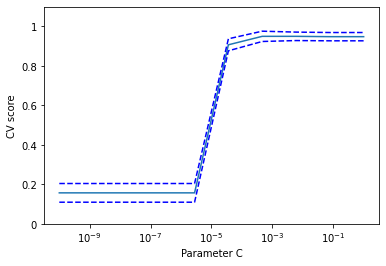

In [7]:
plt.figure()
plt.semilogx(C_s, scores)
plt.semilogx(C_s, np.array(scores) + np.array(scores_std), 'b--')
plt.semilogx(C_s, np.array(scores) - np.array(scores_std), 'b--')
locs, labels = plt.yticks()
plt.yticks(locs, list(map(lambda x: "%g" % x, locs)))
plt.ylabel('CV score')
plt.xlabel('Parameter C')
plt.ylim(0, 1.1)
plt.show()